ё«НуПозвони» — провайдер виртуальной телефонии. Его клиенты — колл-центры (юр. лица), которые:
- распределяют входящие вызовы по своим операторам
- обеспечивают исходящие вызовы от операторов


#### Тарифная сетка
В Телекоме действуют следующие тарифные планы:

|   Тарифный план    |     Ежемесячная плата    |     Входящие    |     Исходящие звонки* внутри сети**|     Лимит внут. исх    |     Исходящие   звонки*, кроме внутренних    | Плата за 1 оператора |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|     А    |     4 000 ₽    |     0    |     0.10 ₽/мин.    |     2000    |     0.3 ₽/мин.    | 50 ₽/оператор |
|     В    |     2 000 ₽    |     0    |     0.15 ₽/мин.    |     500     |     0.5 ₽/мин.    | 150 ₽/оператор |
|     С    |     1 000 ₽    |     0    |     0.30 ₽/мин.    |     0       |     0.7 ₽/мин.    | 300 ₽/оператор |

\* исходящие звонки с учетом времени ожидания; <br>
\** на некоторых тарифах на исходящие звонки внутри сети существует бесплатный лимит в определенное количество минут (см. тарифный план); цена приведена на расход свыше установленного лимита.

Расходы клиента состоят из (<font color='#b89559'>структура затрат</font>):
1. ежемесячной платы +
2. платы за перерасход по внутренним исходящим звонкам, с учетом времени ожидания (`total_call_duration`) +
3. платы за внешние исходящие звонки, с учетом времени ожидания (`total_call_duration`) +
4. платы оператора

<font color='#b89559'>Клиенты, которые используют неэффективно действующий тариф</font>: такие клиенты, которые могли бы иметь меньшие расходы в месяц, если бы использовали один из других тарифных планов. Например, клиент использует тариф `В` и платит `5250 ₽`, но на тарифе `С` он бы платил бы `5150 ₽`, то такой клиент использует свой тариф неэффективно, и ему можно предложить сменить его.


#### Привила выставления счета

<font color='#b89559'>Счета</font> выставляются за прошедший календарный месяц, поэтому датой списания можно считать <font color='#b89559'>1-е число каждого месяца</font>. Остаток внутреннего исходящего трафика сгорает на начало месяца. 

<font color='#b89559'>Тарификация</font> происходит на основе кумулятивных показателей за период расчета (календарный месяц). Общая продолжительность звонков (в минутах) за день по каждому оператору <font color='#b89559'>округляется в большую сторону</font>. 




#### Исходные данные

В работу поступило два датасета, которые характеризуют использование услуг «НуПозвони».

1. датасет `telecom_dataset.csv`
- `user_id` - идентификатор клиента,
- `date` - дата статистики;
- `direction` - направление вызовов: out — исходящий вызов, in — входящий; 
- `internal` - маркер внутренних и внешних вызовов; вызовы между сотрудниками одного колл-центра называют внутренними, остальные — внешними.
- `operator_id` - идентификатор оператора;
- `is_missed_call` - маркер пропущенных вызовов;
- `calls_count` - количество звонков;
- `call_duration` - длительность **всех звонков** без учёта времени ожидания;
- `total_call_duration` - длительность **всех звонков** с учётом времени ожидания.

2. датасет `telecom_clients.csv`
- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.

---

#### период анализа данных

данные для анализа берутся за последние 3 месяца

активные клиенты - пользователи которые совершали звонки за последние 10 дней 


#### цели анализа данных 


*  выяснить сколько будет получать компания если пользователи будут использовать оптимальные тарифы; 
*  как компания может минимизировать потери выручки при переводе клиентов на другие тарифы.


#### декомпозиция 

1. Изучение данных:
   - Импорт и загрузка данных из датасета
   - Просмотр основной информации о данных (столбцы, типы данных, пропущенные значения, дубликаты)
   - Оценка качества данных, их достоверности и полноты



2. Предобработка данных:
   - Обработка пропущенных значений (если есть) и заполнение их соответствующим образом
   - Преобразование формата даты в удобный вид
   - Проверка наличия выбросов и аномалий в данных
   - Создание новых столбцов, если необходимо (например, вычисление общей стоимости звонков для каждого клиента)


3. Анализ данных:
   - определить активных клиентов (польтзователи совершающие звонки 10 дней за последний месяц)
   - найти пользователей которые больше всего платят
   - посчитать сколько переплачивает конкретный клиент на неоптимальном тарифе
     (посчитать сколько пользователь будет тратить на тарифах 'a' 'b' 'c' и подобрать оптимальный)  
   - посчитать выручку компании в текущий момент 
   - посчитать выручку компании после перевода всех клиентов на оптимальные тарифы
   - посчитать выручку компании если на оптимальные тарифы перейдут только активные клиенты 
   - создать сводную таблицу клиентов которые переплачивают с рекомендациями нового тарифа 



4. Предложение решения для уменьшения риска падения выручки:
   - предложение кастомизированных тарифов для клиентов 
   - посчитать колличество прибыли которая потеряет компания если клиенты с неоптимальными тарифпми уйдут к конкуренту 
   - внедрение дополнительных услуг например комбо тарифы с подписками на музыку и фильмамы






5. провести а/б тесты 



6. создать дашборд и презентацию 


7. написать выводы по проекту и предложения по улучшению или оптимизации сервиса телеком компании 



**презентация по проекту:** https://disk.yandex.ru/d/U-c1uofa3lQPYA

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats


import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import scipy
import datetime


In [2]:
# загрузка данных:
telecom = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')
clients = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')

## изучение данных

In [3]:
telecom.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [4]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


анализ буду проводить на основе 2 таблиц

In [5]:
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d')
telecom['date'] = pd.to_datetime(telecom['date']).dt.date
telecom['internal'] = telecom['internal'].astype(bool)


изменение формата date для удобного извлечения нужных дат и замена internal на значение bool

In [6]:
telecom_shape = telecom.shape
clients_shape = clients.shape

In [7]:
clients_missing_rows = clients.isnull().sum()
clients_duplicates = clients.duplicated().sum()

telecom_missing_rows = telecom.isnull().sum()
telecom_duplicates = telecom.duplicated().sum()


In [8]:
print("Объем данных:")
print("Датасет telecom.csv:", telecom_shape)
print("Датасет clients.csv:", clients_shape)

Объем данных:
Датасет telecom.csv: (53902, 9)
Датасет clients.csv: (732, 3)


In [9]:
print("Явные дубликаты и их доля:")
print(telecom_missing_rows)
print("Количество явных дубликатов в датасете telecom.csv:", telecom_duplicates)
print(telecom['operator_id'].count())

Явные дубликаты и их доля:
user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64
Количество явных дубликатов в датасете telecom.csv: 4900
45730


In [10]:
missing_percentage = (telecom['operator_id'].isnull().sum() / len(telecom)) * 100
print(f'Процент пустых строк в столбце operator_id: {missing_percentage:.2f}%')

Процент пустых строк в столбце operator_id: 15.16%


In [11]:
missing_operator_id = telecom[telecom['operator_id'].isnull()]
random_missing = missing_operator_id.sample(n=15)
display(random_missing)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53632,168473,2019-10-29,in,False,NaN,True,1,0,2
35686,167533,2019-09-23,in,True,NaN,True,1,0,12
39974,167781,2019-11-13,in,False,NaN,True,1,0,30
39356,167727,2019-10-30,in,False,NaN,True,1,0,2
50279,168252,2019-11-05,out,False,NaN,False,3,2128,2184
42977,167977,2019-11-07,in,False,NaN,True,7,0,203
24731,167112,2019-10-24,in,False,NaN,True,6,0,130
18607,166975,2019-09-24,in,False,NaN,True,1,0,2
51312,168275,2019-11-05,in,False,NaN,True,2,0,32
20992,167012,2019-08-28,in,False,NaN,True,1,0,21


15 рандомных строк с пропусками operator_id. Могу предположитьь что эти звонки были совершенны по ошибке а клиент сразу сбросил, поэтому продолжительность всех звонков 0 а также все эти звонки обозначаются как пропущенные. 

In [12]:
# ячейка ревьюера:
tmp = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

(tmp
 .query('operator_id != operator_id') # оставляем только пропуски
 .groupby(['is_missed_call','direction']) # группируем по важным признакам
 .agg({'user_id':'nunique','calls_count':'sum'})  # подсчитываем какие-то метрики
 .assign(calls_share = lambda x: x['calls_count'] / tmp.query('operator_id != operator_id').calls_count.sum(),
         total_calls_share = lambda x: x['calls_count'] / tmp.calls_count.sum()) # добавляем новый столбец с расчетом долей 
)

user_id  calls_count  calls_share  total_calls_share
is_missed_call direction                                                      
False          in              10          714     0.006279           0.000805
               out              3          334     0.002937           0.000377
True           in             305       112453     0.988893           0.126814
               out             49          215     0.001891           0.000242

In [13]:
print("Явные дубликаты и их доля:")
print(clients_missing_rows)
print("Количество явных дубликатов в датасете clients.csv:", clients_duplicates)


Явные дубликаты и их доля:
user_id        0
tariff_plan    0
date_start     0
dtype: int64
Количество явных дубликатов в датасете clients.csv: 0


In [14]:
print("Доля пропущенных значений в 'telecom':")
print(telecom.isnull().sum() / len(telecom))

print("Доля пропущенных значений в 'clients':")
print(clients.isnull().sum() / len(clients))

Доля пропущенных значений в 'telecom':
user_id                0.000000
date                   0.000000
direction              0.000000
internal               0.000000
operator_id            0.151608
is_missed_call         0.000000
calls_count            0.000000
call_duration          0.000000
total_call_duration    0.000000
dtype: float64
Доля пропущенных значений в 'clients':
user_id        0.0
tariff_plan    0.0
date_start     0.0
dtype: float64


In [15]:
#добавляем новый столбец
combined_data = pd.merge(telecom, clients, on='user_id')
combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data = combined_data[combined_data['date'].dt.month != 8]
combined_data['month_n'] = combined_data['date'].dt.month

print(combined_data.dtypes)


user_id                         int64
date                   datetime64[ns]
direction                      object
internal                         bool
operator_id                   float64
is_missed_call                   bool
calls_count                     int64
call_duration                   int64
total_call_duration             int64
tariff_plan                    object
date_start             datetime64[ns]
month_n                         int64
dtype: object


**Вывод**

объём датасетов: 
* telecom: (53902, 9)
* Датасет clients: (732, 3)

в таблице clients не было не одного пропуска или дубликата, в таблице telecom было обнариженно 8172 пустых строк(чуть больше 15%). Эти данные не стоит удалять потому что, у клиентов таких звонков было достаночно много и в сумме они минуты за которые надо заплатить. Были изменены типы данных для более удобного анализа и 1 дополнительный столбец. Так же я удалил данные за 1 месяц. Его мы анализировать не будем

In [16]:
display(combined_data.head(5))

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month_n
118,166377,2019-09-02,in,False,880028.0,False,2,66,75,B,2019-08-01,9
119,166377,2019-09-02,in,False,880026.0,False,1,31,34,B,2019-08-01,9
120,166377,2019-09-02,out,False,880026.0,False,16,1853,1983,B,2019-08-01,9
121,166377,2019-09-02,out,False,880026.0,True,6,0,168,B,2019-08-01,9
122,166377,2019-09-02,out,False,880028.0,False,20,2529,2687,B,2019-08-01,9


In [17]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51865 entries, 118 to 53901
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              51865 non-null  int64         
 1   date                 51865 non-null  datetime64[ns]
 2   direction            51865 non-null  object        
 3   internal             51865 non-null  bool          
 4   operator_id          44124 non-null  float64       
 5   is_missed_call       51865 non-null  bool          
 6   calls_count          51865 non-null  int64         
 7   call_duration        51865 non-null  int64         
 8   total_call_duration  51865 non-null  int64         
 9   tariff_plan          51865 non-null  object        
 10  date_start           51865 non-null  datetime64[ns]
 11  month_n              51865 non-null  int64         
dtypes: bool(2), datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 4.5+ MB


In [18]:
#подсчёт уникальных user_id
unique_user_count = combined_data['user_id'].nunique()

print("Количество уникальных user_id:", unique_user_count)

Количество уникальных user_id: 303


In [19]:
#поиск максимальной и минимальной даты
min_date = combined_data['date'].min()
max_date = combined_data['date'].max()

print('Доступные данные охватывают период с', min_date, 'по', max_date)

Доступные данные охватывают период с 2019-09-01 00:00:00 по 2019-11-28 00:00:00


в отфильтрованном датасете имеются даты за 3 месяца

In [20]:
#поиск самого продолжительного периона звонков 
max_call_duration = combined_data['call_duration'].max()
max_call_info = combined_data.loc[combined_data['call_duration'].idxmax()]
print('время разговора', max_call_duration)
display(max_call_info)

время разговора 144395


user_id                             166582
date                   2019-09-25 00:00:00
direction                              out
internal                             False
operator_id                       885876.0
is_missed_call                       False
calls_count                           1230
call_duration                       144395
total_call_duration                 166155
tariff_plan                              A
date_start             2019-08-09 00:00:00
month_n                                  9
Name: 6946, dtype: object

заказчик - говорит, что у одного клиента была какая-то ошибка в фиксации длительности звонков. 

вот он: user_id 166582

время разговора в базе данных 144395 минут 

данные охватывают период с 1 сентября 2019 года по 28 ноября 2019 года. В этот период было 303 уникальных пользователя.

Самый долгий звонок длился 144395 секунд (или примерно 40 часов). Этот звонок был совершен 25 сентября 2019 года пользователем с ID 166582. Звонок был исходящим, и он был совершен во внешнюю сеть.

In [21]:
# Количество клиентов и их распределение по тарифам
num_clients = len(clients['user_id'].unique())
tariff_distribution = clients['tariff_plan'].value_counts()
print(f"Количество клиентов: {num_clients}")
print("Распределение клиентов по тарифам:")
print(tariff_distribution)

Количество клиентов: 732
Распределение клиентов по тарифам:
C    395
B    261
A     76
Name: tariff_plan, dtype: int64


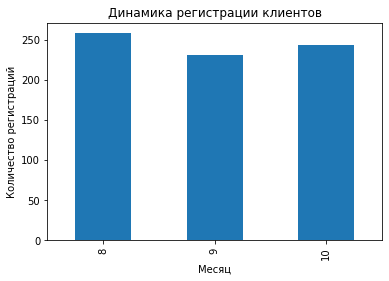

In [22]:
# Динамика регистрации клиентов
clients['date_start'].groupby(clients["date_start"].dt.month).count().plot(kind="bar")
plt.title('Динамика регистрации клиентов')
plt.xlabel('Месяц')
plt.ylabel('Количество регистраций')
plt.show()

прирост клиентов стабилен

In [23]:
inactive_users = combined_data.loc[combined_data['date'].dt.month != 11, 'user_id'].unique()
print(f"Количество клиентов, которые перестали пользоваться услугами в ноябре: {len(inactive_users)}")

Количество клиентов, которые перестали пользоваться услугами в ноябре: 282


In [24]:
# Количество операторов и их распределение по клиентам
num_operators = len(telecom['operator_id'].unique())
operator_distribution = telecom.groupby('user_id')['operator_id'].nunique()
print(f"Количество операторов: {num_operators}")
print("Распределение операторов по клиентам:")
print(operator_distribution.describe())

Количество операторов: 1093
Распределение операторов по клиентам:
count    307.000000
mean       3.557003
std        5.623176
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       50.000000
Name: operator_id, dtype: float64


в среднем человек звонит через 3 операторов 

In [25]:
# Распределение звонков по типам
call_types = telecom['direction'].value_counts()
print("Распределение звонков по типам:")
print(call_types)

Распределение звонков по типам:
out    31917
in     21985
Name: direction, dtype: int64


исходящих звонков больше

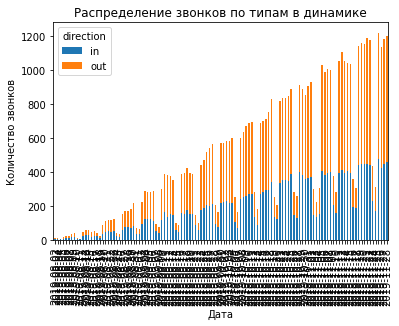

In [26]:
# Распределение звонков по типам в течении времени 
telecom.groupby(['date', 'direction']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Распределение звонков по типам в динамике')
plt.xlabel('Дата')
plt.ylabel('Количество звонков')
plt.show()

на графике виден стабильный рост колличества звонков. 

**вывод**

1. **Клиенты и тарифы**: имеется 732 клиента, большинство из которых (395) используют тариф C, в то время как тариф A используется наименьшим числом клиентов (76). Это может помочь вам лучше понять предпочтения ваших клиентов и планировать маркетинговые кампании.

2. **Активность клиентов**: 282 клиента перестали пользоваться услугами в ноябре. 

3. **Операторы**:  1093 оператора, и большинство клиентов имеют от 1 до 4 операторов. Однако есть клиенты, у которых до 50 операторов, что значительно выше среднего. Это может быть полезной информацией при планировании распределения ресурсов.

4. **Типы звонков**: Количество исходящих звонков (31917) превышает количество входящих (21985)

5. **Динамика звонков**: стабильно растёт 


Большинство клиентов имеют от 1 до 4 операторов, но есть клиенты, у которых до 50 операторов. Количество исходящих звонков превышает количество входящих. Данные охватывают период с 1 сентября 2019 года по 28 ноября 2019 года. В этот период было 303 уникальных пользователя.

Самый долгий звонок длился 144395 секунд (или примерно 40 часов). Этот звонок был совершен 25 сентября 2019 года пользователем с ID 166582. Звонок был исходящим, и он был совершен во внешнюю сеть. Распределение звонков по типам показывает, что исходящих звонков больше, чем входящих.

In [27]:
# Определение активных пользователей в месяце №11
active_days_november = combined_data[combined_data['month_n'] == 11].groupby('user_id')['date'].nunique()
active_users_november = active_days_november[active_days_november >= 1].index

# Сохранение активных пользователей в новой таблице
combined_data_2 = combined_data[combined_data['user_id'].isin(active_users_november)]
print(combined_data_2['month_n'].unique())

[ 9 10 11]


## анализ данных

In [28]:
# Описание тарифных планов
tariff_plans = {
    'A': {'monthly_fee': 4000, 'incoming_calls': 0, 'internal_calls': 0.10, 'outgoing_calls_within_network': 0.10, 'outgoing_calls_outside_network': 0.30, 'operator_fee': 50},
    'B': {'monthly_fee': 2000, 'incoming_calls': 0, 'internal_calls': 0.15, 'outgoing_calls_within_network': 0.15, 'outgoing_calls_outside_network': 0.50, 'operator_fee': 150},
    'C': {'monthly_fee': 1000, 'incoming_calls': 0, 'internal_calls': 0.30, 'outgoing_calls_within_network': 0.30, 'outgoing_calls_outside_network': 0.70, 'operator_fee': 300},
    'D': {'monthly_fee': 2500, 'incoming_calls': 0, 'internal_calls': 0.20, 'outgoing_calls_within_network': 0.20, 'outgoing_calls_outside_network': 0.50, 'operator_fee': 150, 'subscription_for_movies_and_music': 300}
}


In [29]:
# Преобразование данных для расчета
def calculate_calls(row):
    return {
        'outgoing_calls': row['call_duration'] if row['direction'] == 'out' else 0,
        'incoming_calls': row['call_duration'] if row['direction'] == 'in' else 0,
        'internal_calls': row['call_duration'] if row['internal'] else 0,
        'external_calls': row['call_duration'] if not row['internal'] else 0
    }

summary_table = combined_data_2.agg(calculate_calls, result_type='expand', axis=1).join(combined_data_2[['user_id', 'tariff_plan', 'operator_id', 'total_call_duration', 'month_n']])
summary_table = summary_table.groupby(['user_id', 'month_n']).agg({
    'tariff_plan': 'first',
    'operator_id': 'nunique',
    'total_call_duration': 'sum',
    'outgoing_calls' : 'sum',
    'incoming_calls' : 'sum',
    'internal_calls' : 'sum',
    'external_calls' : 'sum'
})

# Функция для расчета расходов для каждого тарифного плана
def calculate_expenses_for_all_plans(row):
    expenses_per_plan = {
        plan_id: (
            plan['monthly_fee'] +
            (plan['subscription_for_movies_and_music'] if 'subscription_for_movies_and_music' in plan else 0) +
            plan['operator_fee'] * row['operator_id'] +
            plan['internal_calls'] * (row['internal_calls'] / 60) +
            plan['outgoing_calls_within_network'] * (row['outgoing_calls'] / 60) +
            plan['outgoing_calls_outside_network'] * (row['external_calls'] / 60)
        )
        for plan_id, plan in tariff_plans.items()
    }

    return pd.Series({
        'expenses_A': expenses_per_plan['A'],
        'expenses_B': expenses_per_plan['B'],
        'expenses_C': expenses_per_plan['C'],
        'expenses_D': expenses_per_plan['D'],
        'current_plan_expense': expenses_per_plan[row['tariff_plan']],
        'optimal_plan': min(expenses_per_plan, key=expenses_per_plan.get)
    })

expenses_and_optimal_plans = summary_table.apply(calculate_expenses_for_all_plans, axis=1)

# Вычисляем переплату для каждого клиента
summary_table = pd.concat([summary_table, expenses_and_optimal_plans], axis=1)
summary_table['overpayment'] = summary_table.apply(lambda row: row[f'expenses_{row["tariff_plan"]}'] - row[f'expenses_{row["optimal_plan"]}'], axis=1)

pd.options.display.float_format = '{:.2f}'.format
#display(summary_table)



In [30]:
def display_monthly_tables(summary_table):
    # Разделение таблицы по месяцам
    summary_table_sep = summary_table[summary_table.index.get_level_values('month_n') == 9]
    summary_table_oct = summary_table[summary_table.index.get_level_values('month_n') == 10]
    summary_table_nov = summary_table[summary_table.index.get_level_values('month_n') == 11]

    # Отображение таблиц
    print("Сентябрь:")
    display(summary_table_sep)
    print("\nОктябрь:")
    display(summary_table_oct)
    print("\nНоябрь:")
    display(summary_table_nov)

# Вызов функции
display_monthly_tables(summary_table)


Сентябрь:


,,tariff_plan,operator_id,total_call_duration,outgoing_calls,incoming_calls,internal_calls,external_calls,expenses_A,expenses_B,expenses_C,expenses_D,current_plan_expense,optimal_plan,overpayment
user_id,month_n,,,,,,,,,,,,,,
166377,9,B,4,117136,93092,1510,0,94602,4828.16,3621.08,3769.15,4498.66,3621.08,B,0.00
166391,9,C,1,36,0,4,0,4,4050.02,2150.03,1300.05,2950.03,1300.05,C,0.00
166392,9,C,2,2817,0,2286,0,2286,4111.43,2319.05,1626.67,3119.05,1626.67,C,0.00
166405,9,B,4,367980,122940,202878,0,325818,6033.99,5622.50,6615.91,6524.95,5622.50,B,0.00
166406,9,B,2,129478,87866,4160,2,92024,4706.57,3286.54,3112.95,4159.76,3286.54,C,173.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167716,9,B,1,3289,1950,0,0,1950,4063.00,2171.12,1332.50,2972.75,2171.12,C,838.62
167721,9,C,0,4,0,0,0,0,4000.00,2000.00,1000.00,2800.00,1000.00,C,0.00
167727,9,C,0,2,0,0,0,0,4000.00,2000.00,1000.00,2800.00,1000.00,C,0.00



Октябрь:


,,tariff_plan,operator_id,total_call_duration,outgoing_calls,incoming_calls,internal_calls,external_calls,expenses_A,expenses_B,expenses_C,expenses_D,current_plan_expense,optimal_plan,overpayment
user_id,month_n,,,,,,,,,,,,,,
166377,10,B,5,116756,93116,2377,4,95489,4882.65,3778.54,4079.64,4656.14,3778.54,B,0.00
166391,10,C,0,2,0,0,0,0,4000.00,2000.00,1000.00,2800.00,1000.00,C,0.00
166392,10,C,2,8168,0,6551,0,6551,4132.76,2354.59,1676.43,3154.59,1676.43,C,0.00
166405,10,B,10,515120,333500,48277,271,381506,6963.81,7513.64,10119.76,8591.79,7513.64,A,549.83
166406,10,B,2,125875,78638,2395,583,80450,4634.28,3168.47,2934.69,4034.49,3168.47,C,233.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168473,10,C,0,4,0,0,0,0,4000.00,2000.00,1000.00,2800.00,1000.00,C,0.00
168500,10,B,0,2,0,0,0,0,4000.00,2000.00,1000.00,2800.00,2000.00,C,1000.00
168522,10,C,1,58,0,36,0,36,4050.18,2150.30,1300.42,2950.30,1300.42,C,0.00



Ноябрь:


,,tariff_plan,operator_id,total_call_duration,outgoing_calls,incoming_calls,internal_calls,external_calls,expenses_A,expenses_B,expenses_C,expenses_D,current_plan_expense,optimal_plan,overpayment
user_id,month_n,,,,,,,,,,,,,,
166377,11,B,4,109235,87019,2915,120,89814,4794.30,3566.30,3683.52,4438.91,3566.30,B,0.00
166391,11,C,1,85,0,13,0,13,4050.07,2150.11,1300.15,2950.11,1300.15,C,0.00
166392,11,C,2,12302,0,10531,0,10531,4152.65,2387.76,1722.86,3187.76,1722.86,C,0.00
166405,11,B,8,575014,340464,95294,35,435723,7146.11,7682.27,10185.93,8766.02,7682.27,A,536.16
166406,11,B,2,50470,31545,1617,0,33162,4318.39,2655.21,2144.61,3481.50,2655.21,C,510.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168583,11,B,2,2176,0,1191,0,1191,4105.95,2309.93,1613.89,3109.93,2309.93,C,696.03
168598,11,C,1,5046,0,4262,11,4251,4071.27,2185.45,1349.65,2985.46,1349.65,C,0.00
168601,11,C,2,49027,27263,10975,0,38238,4336.63,2686.81,2182.43,3509.53,2182.43,C,0.00


в сентябре было 140 клиентов, октябре 249, ноябре 261. из них 300 человек неоптимально используют свои тарифы 

это сводная таблица с данными о тарифах переплатах и времени разговора

в ней содержиться информация об использовании связи активных клиентов(клиенты которые были активны 10 раз) за последний месяц

так же в таблице имеется дополнительный тарифный план D. Помимо стандартных услуг в нём имеется подписка на различные сервисы и пакет интернет трафика 

In [31]:
filtered_table = summary_table[summary_table['overpayment'] != 0]
display(filtered_table[['tariff_plan', 'optimal_plan', 'overpayment']])



tariff_plan optimal_plan  overpayment
user_id month_n                                      
166405  10                B            A       549.83
        11                B            A       536.16
166406  9                 B            C       173.58
        10                B            C       233.78
        11                B            C       510.60
...                     ...          ...          ...
168578  11                B            C      1000.00
168579  11                B            C       690.82
168583  10                B            C       849.92
        11                B            C       696.03
168603  11                B            C       844.72

[300 rows x 3 columns]

в этой таблице отображенны все пользоваетли которые переплачивают за связь. Всего таких 300 человек. каждому из них можно сообщить об ежемесячной переплате и предлажить более подходящий тариф 

In [32]:
filtered_table[['tariff_plan' ,'expenses_A', 'expenses_B', 'expenses_C', 'tariff_plan', 'overpayment']].sort_values(by='overpayment', ascending=False)
display_monthly_tables(filtered_table)


Сентябрь:


,,tariff_plan,operator_id,total_call_duration,outgoing_calls,incoming_calls,internal_calls,external_calls,expenses_A,expenses_B,expenses_C,expenses_D,current_plan_expense,optimal_plan,overpayment
user_id,month_n,,,,,,,,,,,,,,
166406,9,B,2,129478,87866,4160,2,92024,4706.57,3286.54,3112.95,4159.76,3286.54,C,173.58
166407,9,A,7,12833,6737,2339,4796,4280,4390.62,3114.50,3207.60,3924.11,4390.62,B,1276.12
166428,9,B,1,1419,0,961,0,961,4054.80,2158.01,1311.21,2958.01,2158.01,C,846.80
166495,9,B,1,53634,40991,2033,0,43024,4333.44,2611.01,2006.90,3445.17,2611.01,C,604.11
166503,9,B,5,40244,26546,2133,221,28458,4436.90,3054.07,2965.85,3876.37,3054.07,C,88.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167580,9,B,0,4,0,0,0,0,4000.00,2000.00,1000.00,2800.00,2000.00,C,1000.00
167621,9,B,1,114,0,30,0,30,4050.15,2150.25,1300.35,2950.25,2150.25,C,849.90
167634,9,A,1,30,0,12,0,12,4050.06,2150.10,1300.14,2950.10,4050.06,C,2749.92



Октябрь:


,,tariff_plan,operator_id,total_call_duration,outgoing_calls,incoming_calls,internal_calls,external_calls,expenses_A,expenses_B,expenses_C,expenses_D,current_plan_expense,optimal_plan,overpayment
user_id,month_n,,,,,,,,,,,,,,
166405,10,B,10,515120,333500,48277,271,381506,6963.81,7513.64,10119.76,8591.79,7513.64,A,549.83
166406,10,B,2,125875,78638,2395,583,80450,4634.28,3168.47,2934.69,4034.49,3168.47,C,233.78
166407,10,A,7,35543,23257,5744,8646,20355,4504.95,3299.38,3496.99,4125.97,4504.95,B,1205.56
166428,10,B,3,10703,0,9618,44,9574,4197.94,2529.89,2011.92,3329.93,2529.89,C,517.98
166495,10,B,2,31696,22628,3664,0,26292,4269.17,2575.67,2019.88,3394.53,2575.67,C,555.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168329,10,B,0,8,0,0,0,0,4000.00,2000.00,1000.00,2800.00,2000.00,C,1000.00
168377,10,B,0,20,0,0,0,0,4000.00,2000.00,1000.00,2800.00,2000.00,C,1000.00
168446,10,B,0,3,0,0,0,0,4000.00,2000.00,1000.00,2800.00,2000.00,C,1000.00



Ноябрь:


,,tariff_plan,operator_id,total_call_duration,outgoing_calls,incoming_calls,internal_calls,external_calls,expenses_A,expenses_B,expenses_C,expenses_D,current_plan_expense,optimal_plan,overpayment
user_id,month_n,,,,,,,,,,,,,,
166405,11,B,8,575014,340464,95294,35,435723,7146.11,7682.27,10185.93,8766.02,7682.27,A,536.16
166406,11,B,2,50470,31545,1617,0,33162,4318.39,2655.21,2144.61,3481.50,2655.21,C,510.60
166407,11,A,8,18418,12808,1817,5614,9011,4475.76,3321.15,3597.24,4136.50,4475.76,B,1154.61
166428,11,B,1,3226,0,2685,28,2657,4063.33,2172.21,1331.14,2972.24,2172.21,C,841.07
166495,11,B,1,29415,23164,587,0,23751,4207.36,2405.84,1692.91,3225.14,2405.84,C,712.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168562,11,B,1,2039,0,1476,0,1476,4057.38,2162.30,1317.22,2962.30,2162.30,C,845.08
168578,11,B,0,2,0,0,0,0,4000.00,2000.00,1000.00,2800.00,2000.00,C,1000.00
168579,11,B,2,4773,0,2754,0,2754,4113.77,2322.95,1632.13,3122.95,2322.95,C,690.82


таблица отображающая сколько пользователь будет платить наи каждом тарифном плане 

**вывод**

данные показывают, что некоторые клиенты переплачивают за свои текущие тарифные планы. Это может привести к недовольству клиентов, и они могут рассмотреть возможность перехода к конкурентам в поисках более выгодных предложений.

Особенно это касается 300 клиентов, которые переплачивают. Важно обратить внимание на этих клиентов и предложить им оптимальные тарифные планы, которые лучше соответствуют их потребностям. Это не только поможет удержать этих клиентов, но и улучшит их удовлетворенность услугами.

## Предложение решения для уменьшения риска падения выручки

In [33]:
# Расчет прибыли компании на текущих тарифах
current_profit = summary_table['current_plan_expense'].sum()

# Расчет прибыли компании, если все клиенты перейдут на оптимальные тарифы
optimal_profit = summary_table[['expenses_A', 'expenses_B', 'expenses_C', 'expenses_D']].min(axis=1).sum()

# Расчет процента потери прибыли, если пользователи перейдут на оптимальные тарифы
profit_loss_percentage = (current_profit - optimal_profit) / current_profit * 100

non_optimal_users_loss = summary_table[summary_table['tariff_plan'] != summary_table['optimal_plan']]['current_plan_expense'].sum()

print(f"Прибыль компании на текущих тарифах: {current_profit:.2f} руб.")
print(f"Прибыль компании, если все клиенты перейдут на оптимальные тарифы: {optimal_profit:.2f} руб.")
print(f"Процент потери прибыли, если пользователи перейдут на оптимальные тарифы: {profit_loss_percentage:.2f}%")
print(f"Потери компании, если пользователи с неоптимальными тарифами перестанут платить: {non_optimal_users_loss:.2f} руб.")


Прибыль компании на текущих тарифах: 1777792.38 руб.
Прибыль компании, если все клиенты перейдут на оптимальные тарифы: 1480431.62 руб.
Процент потери прибыли, если пользователи перейдут на оптимальные тарифы: 16.73%
Потери компании, если пользователи с неоптимальными тарифами перестанут платить: 987727.88 руб.


In [34]:
summary_table_sep = summary_table[summary_table.index.get_level_values('month_n') == 9]
summary_table_oct = summary_table[summary_table.index.get_level_values('month_n') == 10]
summary_table_nov = summary_table[summary_table.index.get_level_values('month_n') == 11]


In [35]:

# Функция для расчета прибыли и потерь
def calculate_profit_and_loss(summary_table):
    # Расчет прибыли компании на текущих тарифах
    current_profit = summary_table['current_plan_expense'].sum()

    # Расчет прибыли компании, если все клиенты перейдут на оптимальные тарифы
    optimal_profit = summary_table[['expenses_A', 'expenses_B', 'expenses_C', 'expenses_D']].min(axis=1).sum()

    # Расчет процента потери прибыли, если пользователи перейдут на оптимальные тарифы
    profit_loss_percentage = (current_profit - optimal_profit) / current_profit * 100

    # Расчет потерь компании, если пользователи с неоптимальными тарифами перестанут платить
    non_optimal_users_loss = summary_table[summary_table['tariff_plan'] != summary_table['optimal_plan']]['current_plan_expense'].sum()

    return current_profit, optimal_profit, profit_loss_percentage, non_optimal_users_loss

# Расчет и вывод значений для каждого месяца
for month, table in zip(['Сентябрь', 'Октябрь', 'Ноябрь'], [summary_table_sep, summary_table_oct, summary_table_nov]):
    current_profit, optimal_profit, profit_loss_percentage, non_optimal_users_loss = calculate_profit_and_loss(table)
    print(f"{month}:")
    print(f"Прибыль компании на текущих тарифах: {current_profit:.2f} руб.")
    print(f"Прибыль компании, если все клиенты перейдут на оптимальные тарифы: {optimal_profit:.2f} руб.")
    print(f"Процент потери прибыли, если пользователи перейдут на оптимальные тарифы: {profit_loss_percentage:.2f}%")
    print(f"Потери компании, если пользователи с неоптимальными тарифами перестанут платить: {non_optimal_users_loss:.2f} руб.")
    print('------------------------------------------------------------------')



Сентябрь:
Прибыль компании на текущих тарифах: 380184.04 руб.
Прибыль компании, если все клиенты перейдут на оптимальные тарифы: 306615.21 руб.
Процент потери прибыли, если пользователи перейдут на оптимальные тарифы: 19.35%
Потери компании, если пользователи с неоптимальными тарифами перестанут платить: 235618.10 руб.
------------------------------------------------------------------
Октябрь:
Прибыль компании на текущих тарифах: 652202.86 руб.
Прибыль компании, если все клиенты перейдут на оптимальные тарифы: 543269.66 руб.
Процент потери прибыли, если пользователи перейдут на оптимальные тарифы: 16.70%
Потери компании, если пользователи с неоптимальными тарифами перестанут платить: 362406.56 руб.
------------------------------------------------------------------
Ноябрь:
Прибыль компании на текущих тарифах: 745405.47 руб.
Прибыль компании, если все клиенты перейдут на оптимальные тарифы: 630546.76 руб.
Процент потери прибыли, если пользователи перейдут на оптимальные тарифы: 15.41%
По

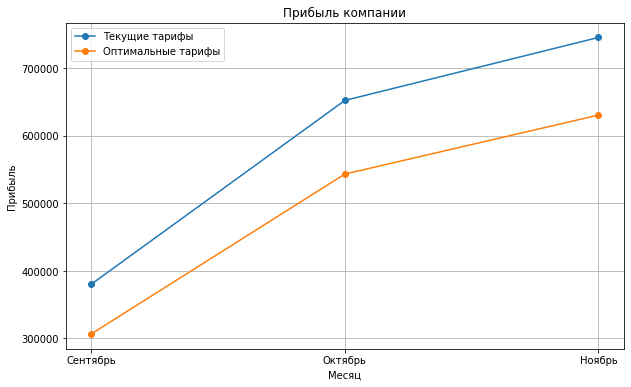

In [36]:

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(['Сентябрь', 'Октябрь', 'Ноябрь'], [summary_table_sep['current_plan_expense'].sum(), summary_table_oct['current_plan_expense'].sum(), summary_table_nov['current_plan_expense'].sum()], marker='o', label='Текущие тарифы')
plt.plot(['Сентябрь', 'Октябрь', 'Ноябрь'], [summary_table_sep[['expenses_A', 'expenses_B', 'expenses_C', 'expenses_D']].min(axis=1).sum(), summary_table_oct[['expenses_A', 'expenses_B', 'expenses_C', 'expenses_D']].min(axis=1).sum(), summary_table_nov[['expenses_A', 'expenses_B', 'expenses_C', 'expenses_D']].min(axis=1).sum()], marker='o', label='Оптимальные тарифы')
plt.title('Прибыль компании')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.legend()
plt.grid(True)
plt.show()


**вывод**

На данный момент есть 300 пользователя которые переплачивают за связь. В проекте имеется таблица с id клиента, его тарифным планом, рекомендуемым тарифным планом а так же суммой которую клиент переплачивает

Есть вторая таблица, в ней имеется информация о там сколько будет платить человек на каждом из доступных тарифов

Бизнес показатели:

В сентябре, октябре и ноябре прибыль компании составила 380184.04 руб., 652202.86 руб. и 745405.47 руб. соответственно.

Если все клиенты перейдут на оптимальные тарифы, прибыль компании снизится на 19.35% в сентябре, 16.70% в октябре и 15.41% в ноябре.

Если пользователи с неоптимальными тарифами перестанут платить, потери компании составят 235618.10 руб. в сентябре, 362406.56 руб. в октябре и 389703.22 руб. в ноябре.


Общая прибыль за квартал: 1777792.37 руб.

- Прибыль за квартал, если все клиенты перейдут на оптимальные тарифы 1480431.63 руб.

- Общая потеря прибыли за квартал, если все клиенты перейдут на оптимальные тарифы: 16.74%.

- Общие потери за квартал, если пользователи с неоптимальными тарифами перестанут платить: 987727.88 руб.

прибыль компании растёт от месяца к месяцу но всё же стоит стоит подготовиться к запуску продукта конкурента, а именно подобрать лптимальные тарифные планы и добавть новые тарифы или услуги 

## диаграммы

In [37]:
incoming_calls = combined_data[combined_data['direction'] == 'in']
call_duration = incoming_calls['call_duration']
#среднее значение столбца call_duration
avg_incoming_duration = call_duration.mean()

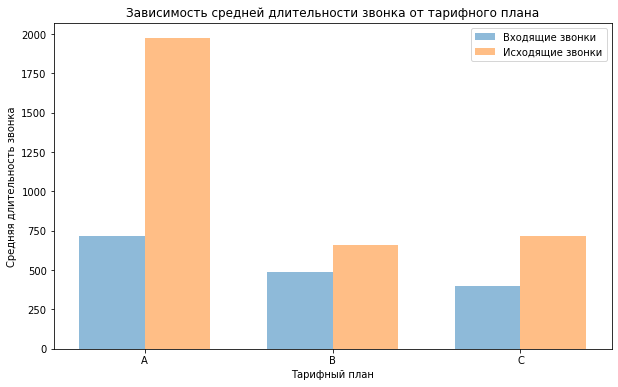

In [38]:
#строки, соответствующие входящим звонкам
avg_incoming_duration = incoming_calls.groupby('tariff_plan')['call_duration'].mean()

outgoing_calls = combined_data[combined_data['direction'] == 'out']
avg_outgoing_duration = outgoing_calls.groupby('tariff_plan')['call_duration'].mean()

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(avg_incoming_duration.index))

plt.bar(index, avg_incoming_duration.values, bar_width, alpha=0.5, label='Входящие звонки')
plt.bar(index + bar_width, avg_outgoing_duration.values, bar_width, alpha=0.5, label='Исходящие звонки')

plt.xlabel('Тарифный план')
plt.ylabel('Средняя длительность звонка')
plt.title('Зависимость средней длительности звонка от тарифного плана')

plt.legend()

# Добавляем подписи к оси X
plt.xticks(index + bar_width / 2, avg_incoming_duration.index)

# Отображаем график
plt.show()

колличкство входящих звонков примерно одинаковое 
а колличество исходящих различается

 - больше всего звонят с тарифа A 
 (он самый дорогой но при этом выгоден для большого колличества звонков)
 
 
 - далее идёт тариф C 
 (он самый недорогой но звонят с него больше чем со среднего тарифа В)

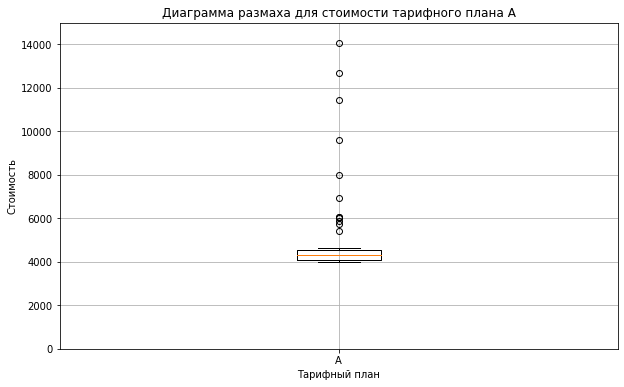

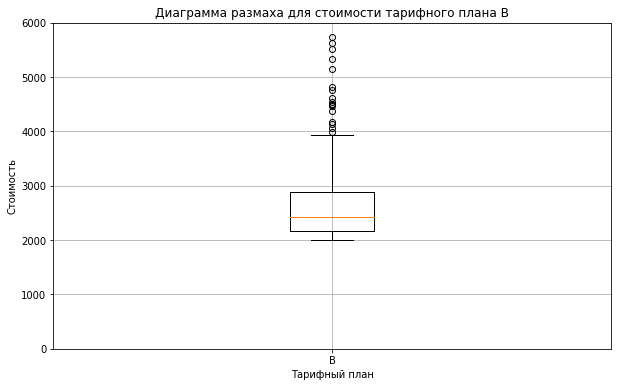

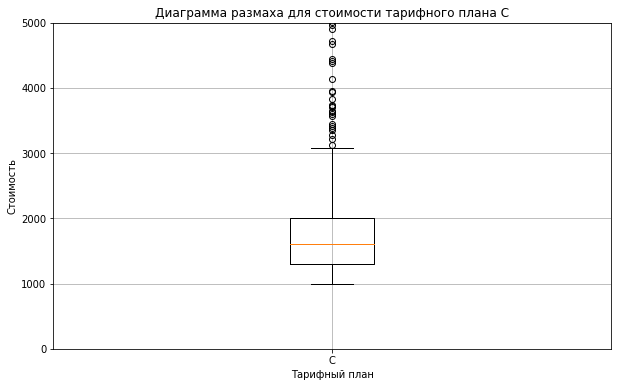

In [39]:
# Создание отдельных диаграмм размаха для каждого тарифного плана
for plan, limit in zip(['A', 'B', 'C'], [15000, 6000, 5000]):
    plt.figure(figsize=(10, 6))
    plt.boxplot(summary_table[summary_table['tariff_plan'] == plan]['current_plan_expense'], labels=[plan])
    plt.title(f'Диаграмма размаха для стоимости тарифного плана {plan}')
    plt.xlabel('Тарифный план')
    plt.ylabel('Стоимость')
    plt.ylim([0, limit])  # Ограничение оси y
    plt.grid(True)
    plt.show()


In [40]:
for plan in ['A', 'B', 'C']:
    data = summary_table[summary_table['tariff_plan'] == plan]['current_plan_expense']
    print(f"Процентили для тарифного плана {plan}:")
    for percentile in [25, 50, 75]:
        value = np.percentile(data, percentile)
        print(f"{percentile}%: {value:.5}")


Процентили для тарифного плана A:
25%: 4088.9
50%: 4307.9
75%: 4522.3
Процентили для тарифного плана B:
25%: 2159.7
50%: 2418.5
75%: 2877.6
Процентили для тарифного плана C:
25%: 1303.7
50%: 1601.7
75%: 2012.2


боксплоты со средней плптой по каждому из тарифов, на тарифном плане А самый маленький разброс среднего чека. На тарифных планах В и С разброс больше 

Тарифный план A является самым дорогим, с медианной стоимостью в 4307.90, в то время как тарифный план C является самым дешевым, с медианной стоимостью в 1601.66.

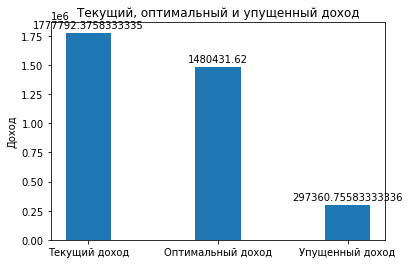

In [41]:

# Расчет текущего и оптимального дохода, а также упущенного дохода
current_income = summary_table['current_plan_expense'].sum()
optimal_income = summary_table[['expenses_A', 'expenses_B', 'expenses_C', 'expenses_D']].min(axis=1).sum()
missed_income = current_income - optimal_income

# Создание столбчатой диаграммы
labels = ['Текущий доход', 'Оптимальный доход', 'Упущенный доход']
values = [current_income, optimal_income, missed_income]

x = np.arange(len(labels))  # местоположение меток
width = 0.35  # ширина столбцов

fig, ax = plt.subplots()
rects = ax.bar(x, values, width)

# Добавление некоторого текста для меток, названия и пользовательской оси x
ax.set_ylabel('Доход')
ax.set_title('Текущий, оптимальный и упущенный доход')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Вывод значений на столбцах
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


при переходе на опттмальные тарифы компания потеряет 16.74% прибыли. Но этолучше чем потеря платящих клиентов 

## Гипотезы

1. **Гипотеза о влиянии тарифного плана на переплаты:**
    - **Общая гипотеза:** Тарифный план влияет на размер переплаты клиента.
    - **Н0 (нулевая гипотеза):** Размер переплаты одинаков для всех тарифных планов.
    - **Н1 (альтернативная гипотеза):** Размер переплаты отличается для разных тарифных планов.

2. **Гипотеза о влиянии количества звонков на переплаты:**
    - **Общая гипотеза:** Количество звонков влияет на размер переплаты клиента.
    - **Н0 (нулевая гипотеза):** Размер переплаты не зависит от количества звонков.
    - **Н1 (альтернативная гипотеза):** Размер переплаты зависит от количества звонков.


In [42]:
def calculate_expenses_for_plan_A(combined_data_2):
    expenses_A = combined_data_2['call_duration'] * tariff_plans['A']['internal_calls']
    return expenses_A

def calculate_expenses_for_plan_B(combined_data_2):
    expenses_B = combined_data_2['call_duration'] * tariff_plans['B']['internal_calls']
    return expenses_B

def calculate_expenses_for_plan_C(combined_data_2):
    expenses_C = combined_data_2['call_duration'] * tariff_plans['C']['internal_calls']
    return expenses_C

#def calculate_expenses_for_plan_D(combined_data_2):
    #expenses_D = combined_data_2['call_duration'] * tariff_plans['D']['internal_calls']
    #return expenses_D


In [43]:
def determine_optimal_plan(row):
    expenses = {
        'A': row['expenses_A'],
        'B': row['expenses_B'],
        'C': row['expenses_C'],
        #'D': row['expenses_D']
    }
    optimal_plan = min(expenses, key=expenses.get)
    return optimal_plan


In [44]:
# подсчёьт каждого плана
combined_data_2['expenses_A'] = calculate_expenses_for_plan_A(combined_data_2)
combined_data_2['expenses_B'] = calculate_expenses_for_plan_B(combined_data_2)
combined_data_2['expenses_C'] = calculate_expenses_for_plan_C(combined_data_2)
#combined_data_2['expenses_D'] = calculate_expenses_for_plan_D(combined_data_2)

# оптимальный план
combined_data_2['optimal_plan'] = combined_data_2.apply(determine_optimal_plan, axis=1)

# переплата
combined_data_2['overpayment'] = combined_data_2.apply(lambda row: row[f'expenses_{row["tariff_plan"]}'] - row[f'expenses_{row["optimal_plan"]}'], axis=1)



In [45]:
# Группировка данных по тарифному плану
tariff_groups = [combined_data_2[combined_data_2['tariff_plan'] == tariff]['overpayment'] for tariff in combined_data_2['tariff_plan'].unique()]

# Выполнение ANOVA-теста
f_statistic, p_value = stats.f_oneway(*tariff_groups)

print(f'F-статистика: {f_statistic}, p-значение: {p_value}')
if p_value < 0.05:
    print("Мы отвергаем нулевую гипотезу и делаем вывод, что размер переплаты отличается для разных тарифных планов.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу и делаем вывод, что размер переплаты одинаков для всех тарифных планов.")



F-статистика: 1929.0778269538519, p-значение: 0.0
Мы отвергаем нулевую гипотезу и делаем вывод, что размер переплаты отличается для разных тарифных планов.


In [46]:
# Вычисление корреляции
correlation, p_value = stats.pearsonr(combined_data_2['calls_count'], combined_data_2['overpayment'])

print(f'Корреляция: {correlation}, p-значение: {p_value}')
if p_value < 0.05:
    print("Мы отвергаем нулевую гипотезу и делаем вывод, что размер переплаты зависит от количества звонков.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу и делаем вывод, что размер переплаты не зависит от количества звонков.")


Корреляция: 0.12296400235821488, p-значение: 1.5424004594251675e-162
Мы отвергаем нулевую гипотезу и делаем вывод, что размер переплаты зависит от количества звонков.


**результаты провери гипотиз**

*Гипотеза о влиянии тарифного плана на переплаты:*

- Полученное p-значение равно 0.0, что меньше уровня значимости 0.05. Это означает, что мы отвергаем нулевую гипотезу и делаем вывод, что размер переплаты отличается для разных тарифных планов.

*Гипотеза о влиянии количества звонков на переплаты:*

- Полученное p-значение равно 1.54e-162, что также меньше уровня значимости 0.05. Это означает, что мы отвергаем нулевую гипотезу и делаем вывод, что размер переплаты зависит от количества звонков.

## калькулятор для отдела маркетинга 

In [47]:
combined_data_2['outgoing_calls'] = combined_data_2.direction.eq('out').mul(combined_data.call_duration)
combined_data_2['incoming_calls'] = combined_data_2.direction.eq('in').mul(combined_data.call_duration)
combined_data_2['internal_calls'] = combined_data_2.internal.fillna(False).mul(combined_data.call_duration)
combined_data_2['external_calls'] = (~combined_data_2.internal.fillna(False)).mul(combined_data.call_duration)

In [48]:
def calculate_expenses(user_id, custom_plan):
    # Получение данных для заданного пользователя
    user_data = combined_data_2[combined_data_2['user_id'] == user_id]
    
    current_plan = tariff_plans[user_data['tariff_plan'].iloc[0]]
    current_expenses = calculate_plan_expenses(user_data, current_plan)
    
    # Расчет общих расходов по кастомизированному тарифному плану
    custom_expenses = calculate_plan_expenses(user_data, custom_plan)
    
    return current_expenses, custom_expenses

def calculate_plan_expenses(user_data, plan):
    monthly_fee = plan['monthly_fee'] * len(user_data['month_n'].unique())
    
    # Расчет платы за операторов
    operator_fee = plan['operator_fee'] * user_data['operator_id'].nunique()
    
    internal_outgoing_calls_fee = plan['internal_calls'] * (user_data['internal_calls'].sum() / 60)
    
    external_outgoing_calls_fee = plan['outgoing_calls_outside_network'] * (user_data['external_calls'].sum() / 60)
    
    return monthly_fee + operator_fee + internal_outgoing_calls_fee + external_outgoing_calls_fee



**с помощью этого калькулятора можно собрать кастомный тариф для любого клиента, и сравнить на сколько измится плата в месяц**

как работает:

вводим id клиента и стоимость каждой услуги. После этого получаем плату по старому и новому тарифу


In [49]:
#  использования функции
custom_plan = {'monthly_fee': 1000, 
               'operator_fee': 10, 
               'internal_calls': 0.05, 
               'outgoing_calls_within_network': 0.10, 
               'outgoing_calls_outside_network': 0.30}
current_expenses, custom_expenses = calculate_expenses(166658, custom_plan)

print(f"Общие расходы по текущему тарифному плану: {current_expenses:.2f} руб.")
print(f"Общие расходы по кастомизированному тарифному плану: {custom_expenses:.2f} руб.")


Общие расходы по текущему тарифному плану: 27094.93 руб.
Общие расходы по кастомизированному тарифному плану: 14296.82 руб.


## предложения по увеличению выручки

 предложения

Не в одном из тарифов нет нет пакета интернет трафика. Это может стать причиной перехода клиентов к другой телеком компании



***причины для предоставения кастомизированных тарифов***

1. Удовлетворение разнообразных потребностей: Разные люди имеют разные потребности в связи. Кастомизированные тарифы позволяют пользователям выбирать план, который соответствует их конкретным потребностям в минутах разговора, сообщениях и мобильном интернете. Например, одни могут предпочесть больше интернет-трафика, а другие — больше звонков и сообщений.

2. Экономия денег: Кастомизированные тарифы позволяют пользователям оплачивать только те услуги, которые им действительно необходимы. Это позволяет сэкономить деньги, так как нет необходимости платить за ненужные опции или ограничения.

3. Больший комфорт и удобство: Когда пользователи могут выбирать тариф, который соответствует их потребностям, это создает более комфортный опыт использования мобильной связи. Они не будут переплачивать за лишние услуги или сталкиваться с нехваткой минут или трафика.

***Пользователям также нужен мобильный интернет по нескольким причинам:***

1. Доступ к информации: Мобильный интернет предоставляет пользователям мгновенный доступ к информации в любое время и в любом месте. Это позволяет получать новости, искать информацию, общаться, и многое другое, что раньше было доступно только на компьютере.

2. Социальные сети и мессенджеры: Мобильный интернет позволяет пользователям оставаться на связи с друзьями и семьей через социальные сети и мессенджеры. Это важно для поддержания социальных связей и обмена информацией.

3. Работа и развлечения: Многие люди используют мобильный интернет для работы, онлайн-игр, потокового просмотра видео, музыки и других развлечений. Мобильный интернет обеспечивает им доступ к этим возможностям в любое время.

4. Навигация: Мобильный интернет позволяет использовать навигационные приложения, что особенно полезно при поиске местоположения, поездках и перемещении по незнакомым местам.

В итоге, предоставление кастомизированных тарифов и доступ к мобильному интернету удовлетворяет разнообразные потребности пользователей и создает удобный и современный опыт использования мобильной связи.

## Вопросы от заказчика 

1. Тут как раз небольшой вопрос от заказчика, была ли какая-то динамика среднего чека за последние три месяца или нет? Кто-то уже подсчитал?

In [50]:
# Вычисляем средний чек для каждого месяца
average_check_per_month = summary_table.groupby('month_n')['current_plan_expense'].mean()

# Получаем значения за последние три месяца
last_three_months = average_check_per_month.sort_index(ascending=False).head(3)

print(last_three_months)


month_n
11   2855.96
10   2728.88
9    2715.60
Name: current_plan_expense, dtype: float64


Средний чек вырос следующим образом:

От 9-го к 10-му месяцу: +0.49%
От 10-го к 11-му месяцу: +4.66%

In [51]:
# Группировка данных по тарифному плану и месяцу
average_check_per_month_per_plan = summary_table.groupby(['tariff_plan', 'month_n'])['current_plan_expense'].mean()
# Получение значений за последние три месяца для каждого тарифного плана
last_three_months_per_plan = average_check_per_month_per_plan.sort_index(level='month_n', ascending=False).groupby(level='tariff_plan').head(3)

#print(last_three_months_per_plan)


2. заказчик - говорит, что у одного клиента была какая-то ошибка в фиксации длительности звонков.


In [52]:
display(max_call_info)

user_id                             166582
date                   2019-09-25 00:00:00
direction                              out
internal                             False
operator_id                      885876.00
is_missed_call                       False
calls_count                           1230
call_duration                       144395
total_call_duration                 166155
tariff_plan                              A
date_start             2019-08-09 00:00:00
month_n                                  9
Name: 6946, dtype: object

вот он: user_id 166582

время разговора в базе данных 144395 минут

данные охватывают период с 1 сентября 2019 года по 28 ноября 2019 года. В этот период было 303 уникальных пользователя.

Самый долгий звонок длился 144395 секунд (или примерно 40 часов). Этот звонок был совершен 25 сентября 2019 года пользователем с ID 166582. Звонок был исходящим, и он был совершен во внешнюю сеть.